# Análise Exploratória - Dados de Emissões



## Leitura e análise inicial dos dados

Inicializar um DataFrame a partir do arquivo `../data/Gas Emissions/total-ghg-emissions.csv`

In [105]:
# Resposta:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Gas Emissions/total-ghg-emissions.csv', sep=',')
df.head(n=15)

Entity                   object
Code                     object
Year                      int64
Total including LUCF    float64
dtype: object

Inicializa outro Dataframe de PIB (GDP)

In [106]:
df_gdp = pd.read_csv('../data/GDP/GDP_Countries.csv', sep = ',')

df_gdp = df_gdp.drop(['Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', 'Unnamed: 66'], axis=1)

df_gdp_new = df_gdp.melt(id_vars=['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

df_gdp_new.head(n=15)

df_gdp_new["Year"] = pd.to_numeric(df_gdp_new["Year"])

df_gdp_new.dtypes


Country Name     object
Country Code     object
Year              int64
GDP             float64
dtype: object

Inicializo o dataframe de países, para verificar o continente de cada país

In [80]:
df_countries = pd.read_csv('../data/countries/country-continent.csv', sep = ',')
df_countries.rename(columns = {'name': 'Country Name'}, inplace = True)
df_countries.drop(df_countries.columns.difference(['Country Name','region', 'sub-region']), 1, inplace=True)
df_countries
#df_gdp.merge(df_countries, )

C:\Users\ACQDFZZ\AppData\Local\Temp\1\ipykernel_8428\3123994201.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_countries.drop(df_countries.columns.difference(['Country Name','region', 'sub-region']), 1, inplace=True)


,Country Name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


Realizo um merge com os países e GDP, para verificar quais são os continentes e suas subregiões e agrupo pelas regiões (Continentes)

In [81]:
df_gdp_new = df_gdp.merge(df_countries, on = 'Country Name')
df_gdp_continents = df_gdp_new.groupby(['region','Year']).sum('GDP')
df_gdp_continents

GDP
region  Year              
Africa  1991  4.823339e+11
        1992  4.580342e+11
        1993  4.306029e+11
        1994  4.257270e+11
        1995  4.753668e+11
...                    ...
Oceania 2017  1.589292e+12
        2018  1.698831e+12
        2019  1.664010e+12
        2020  1.595062e+12
        2021  1.827700e+12

[155 rows x 1 columns]

Realizo o pivot para verificar os PIBs por continente

In [92]:
df_gdp_continents = pd.read_csv('../data/GDP/GDP_Continents.csv', sep=',')
df_gdp_continents_pivot = df_gdp_continents.pivot(index='Year', columns='region', values='GDP')
df_gdp_continents_pivot
# df_gdp_continents.plot.line(figsize=(15,10))

# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()
#df_gdp_pivot = df_gdp_continents.transpose()

# df_gdp_pivot.columns = df_gdp_pivot.iloc[0]
# df_gdp_pivot = df_gdp_pivot[1:]
#df_gdp_pivot

region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
1991,4.823339e+11,7.897973e+12,5.000188e+12,8.307676e+12,3.805668e+11
1992,4.580342e+11,8.344097e+12,5.450222e+12,9.023277e+12,3.804188e+11
1993,4.306029e+11,8.874920e+12,6.082883e+12,8.236270e+12,3.726598e+11
1994,4.257270e+11,9.567176e+12,6.881372e+12,8.731244e+12,3.932390e+11
1995,4.753668e+11,1.007855e+13,7.874868e+12,1.020978e+13,4.473918e+11
1996,4.971066e+11,1.070127e+13,7.543242e+12,1.042043e+13,4.875097e+11
1997,5.129918e+11,1.141380e+13,7.230034e+12,9.821769e+12,5.167745e+11
1998,4.990508e+11,1.189247e+13,6.665971e+12,1.013955e+13,4.697765e+11
1999,5.148952e+11,1.227418e+13,7.433662e+12,1.011845e+13,4.621259e+11


Realizo o gráfico de linhas para verificar as 

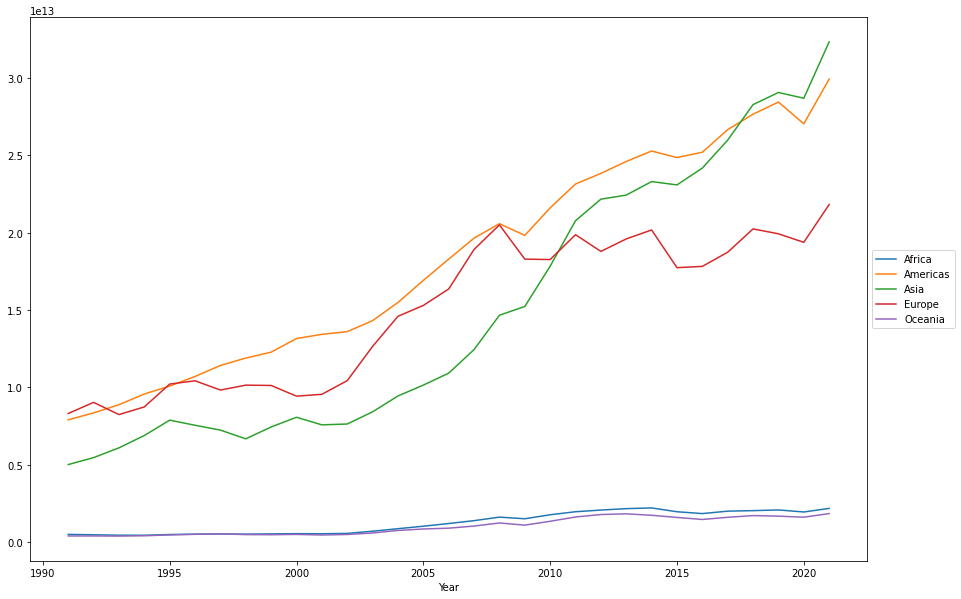

In [94]:
import matplotlib.pyplot as plt
#df_grouped = df_emissions.groupby(['Entity', 'Year']).mean()
#df_pivot = df_pivot.set_index('Year')
df_gdp_continents_pivot.plot.line(figsize=(15,10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Selecionar as colunas desejadas

In [ ]:
# Resposta:
from operator import concat


df_emissions = df[['Entity', 'Year', 'Total including LUCF']]
df_emissions.rename(columns = {'Total including LUCF': 'Total_Emissions'}, inplace = True)
#df_decade['new_col'] = concat(df_decade['Year'].astype(str).str[0], df_decade['Year'].astype(str).str[1])
df_emissions.dtypes

C:\Users\ACQDFZZ\AppData\Local\Temp\1\ipykernel_8428\1815816652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns = {'Total including LUCF': 'Total_Emissions'}, inplace = True)


Entity              object
Year                 int64
Total_Emissions    float64
dtype: object

Seleciono apenas os continentes para fazer a comparação

In [ ]:
from operator import concat
# df_emissions['Decade'] = df_emissions['Year']/10
# df_emissions = df_emissions.astype({'Decade':'int'})
# df_emissions['Decade'] = df_emissions['Decade']*10

# df_emissions = df_emissions.groupby(['Entity', 'Decade']).mean()
# df_emissions.pop('Year')
# df_emissions['Total including LUCF'] = df_emissions['Total including LUCF']*10^6

df_emissions_continents = df_emissions.drop(df[(df['Entity'] != 'South America') & (df['Entity'] != 'North America') & (df['Entity'] != 'Europe')&  (df['Entity'] != 'Africa') & (df['Entity'] != 'Oceania') & (df['Entity'] != 'Asia') ].index, inplace=True)
df_emissions_continents


C:\Users\ACQDFZZ\AppData\Local\Temp\1\ipykernel_8428\3687904401.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(df[(df['Entity'] != 'South America') & (df['Entity'] != 'North America') & (df['Entity'] != 'Europe')&  (df['Entity'] != 'Africa') & (df['Entity'] != 'Oceania') & (df['Entity'] != 'Asia') ].index, inplace=True)


,Entity,Year,Total_Emissions
30,Africa,1990,2.148500e+09
31,Africa,1991,2.215110e+09
32,Africa,1992,2.237260e+09
33,Africa,1993,2.267390e+09
34,Africa,1994,2.357190e+09
...,...,...,...
5094,South America,2015,3.111730e+09
5095,South America,2016,3.143800e+09
5096,South America,2017,3.132580e+09
5097,South America,2018,3.069590e+09


In [ ]:
df_pivot = df_emissions.pivot(index='Year', columns='Entity', values='Total_Emissions')
df_pivot

Entity,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,
1990,2.148500e+09,9.678540e+09,8.531271e+09,6.667000e+09,6.295100e+08,2.969540e+09
1991,2.215110e+09,9.963210e+09,8.356710e+09,6.629540e+09,6.302300e+08,3.005280e+09
1992,2.237260e+09,1.024373e+10,7.922740e+09,6.733250e+09,6.331000e+08,3.031820e+09
1993,2.267390e+09,1.060180e+10,7.533820e+09,6.852090e+09,6.356600e+08,3.062130e+09
1994,2.357190e+09,1.096161e+10,7.167430e+09,6.993080e+09,6.440900e+08,3.097380e+09
1995,2.418230e+09,1.157524e+10,7.108660e+09,7.058730e+09,6.567600e+08,3.163900e+09
1996,2.461640e+09,1.157728e+10,7.143840e+09,7.274480e+09,6.561200e+08,3.219510e+09
1997,2.497940e+09,1.271293e+10,6.883820e+09,7.575230e+09,6.825600e+08,3.293090e+09
1998,2.572780e+09,1.204994e+10,6.830300e+09,7.682240e+09,6.943500e+08,3.343070e+09


## Visualização da distribuição das variáveis

Verificar os países que mais emitiam gases por década

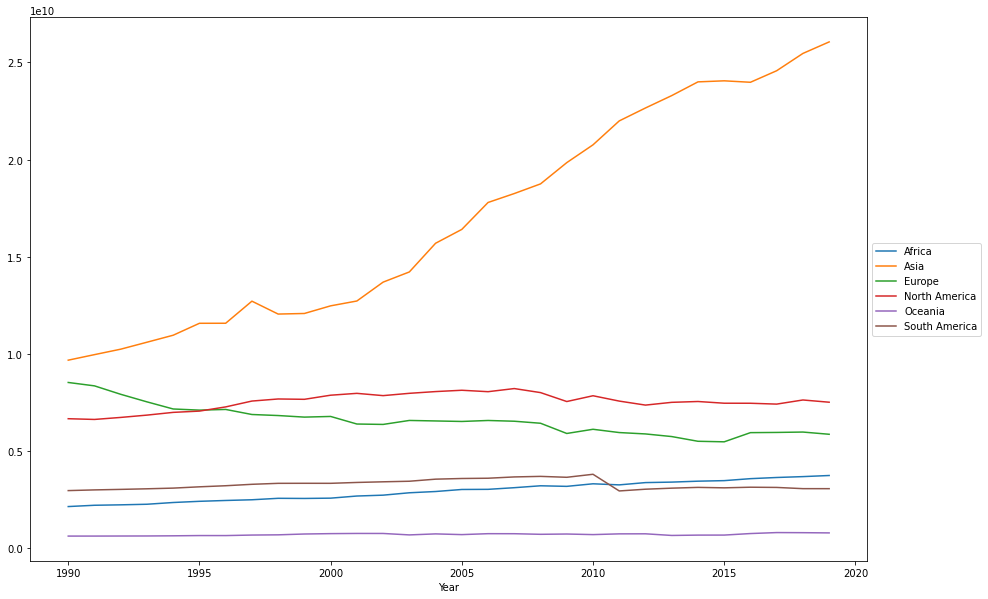

In [ ]:
# Resposta:
import matplotlib.pyplot as plt
#df_grouped = df_emissions.groupby(['Entity', 'Year']).mean()
#df_pivot = df_pivot.set_index('Year')
df_pivot.plot.line(figsize=(15,10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
# df_masc = df.loc[df['SEXO'] == 'M']
# df_masc['IDADE'].hist()

Verifico se existe alguma correlação entre os continentes

In [ ]:
df_corr = df_pivot.corr()
df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr

Entity,Africa,Asia,Europe,North America,Oceania,South America
Entity,,,,,,
Africa,1.000000,0.984574,-0.889871,0.453788,0.665783,0.101369
Asia,0.984574,1.000000,-0.857607,0.320049,0.583283,-0.029153
Europe,-0.889871,-0.857607,1.000000,-0.588267,-0.631952,-0.200650
North America,0.453788,0.320049,-0.588267,1.000000,0.631336,0.760151
Oceania,0.665783,0.583283,-0.631952,0.631336,1.000000,0.271560
South America,0.101369,-0.029153,-0.200650,0.760151,0.271560,1.000000


Aqui vemos que a Europe tem oposta relação entre Africa e Asia

Junto os dois datasets

In [110]:
# Resposta:

df_juncao = pd.merge(df_emissions, df_gdp_new, how='left', left_on=['Entity', 'Year'], right_on=['Country Name', 'Year'])
df_juncao = df_juncao.dropna()
df_juncao

SyntaxError: invalid syntax (1585468758.py, line 5)

Exibo um box plot, verificando a relação entre PIB e Emissão

In [ ]:
# Resposta:
vis5 = sns.boxplot(data = df, x = "Income Group", y = "Birth rate")
fig = vis5.get_figure()
fig.savefig("fig1.png")

## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 reclamações. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [ ]:
# Resposta:
# df_assunto = df.groupby(['ASSUNTO']).size().sort_values(ascending=False).reset_index(name='total')
# df_assunto = df_assunto[df_assunto['total']>60]
# df_assunto


In [ ]:
# Resposta:
# lista_assunto = list(df_assunto['ASSUNTO'])
# lista_assunto

Crie um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [ ]:
# Resposta:

#df_top_assuntos = pd.DataFrame (lista_assunto, columns = ['ASSUNTO'])
# df_top_assuntos

## Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [ ]:
# # Resposta:
# df_new = pd.crosstab(df_top_assuntos['ASSUNTO'], df['BAIRRO_ASS'])
# df_new

Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [ ]:
# Resposta:
# df_new.corr()

Use um Heatmap para exibir as correlações com cores.

In [ ]:
# Resposta:
# df_corr = df_new.corr()
# df_corr = df_corr.style.background_gradient(cmap='RdBu')
# df_corr

É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?

R: O jardim botânico é o bairro que possui grande número de maiores reclamações, pela diferença entre os outros bairros

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais reclamações.

- Crie um DataFrame com a contagem de reclamações por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais reclamações

In [ ]:
# Resposta:
# df_bairros_reclamacoes = df.groupby(['BAIRRO_ASS']).size().sort_values(ascending=False).reset_index(name='total')
# df_bairros_reclamacoes


In [ ]:
# Resposta:

# df_bairros_reclamacoes.plot.bar(x='BAIRRO_ASS', y= 'total')

O problema de considerar apenas o total de reclamações é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de reclamações, ou seja, o número de reclamações por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [ ]:
# Resposta:
# df_pop_bairros = pd.read_csv('../data/dados_bairros.csv', sep=',', encoding='latin-1')
# df_pop_bairros['Bairro'] = df_pop_bairros['Bairro'].str.lower()
# df_pop_bairros = df_pop_bairros.join(df_bairros_reclamacoes)
# df_pop_bairros

Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de reclamações pela coluna de total de habitantes.

In [ ]:
# Resposta:

# df_pop_bairros['taxa'] = df_pop_bairros.total /  df_pop_bairros.Total

# df_pop_bairros

Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de reclamações.

In [ ]:
# Resposta:

# df_pop_bairros.plot.bar(x='BAIRRO_ASS', y= 'taxa')

## Analisando tendências temporais

Vamos agora identificar os meses com mais reclamações. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando as reclamações por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


In [ ]:
# Resposta:
# df['DATA']= pd.to_datetime(df['DATA'], infer_datetime_format = True)
# df_mes = df.groupby(df.DATA.dt.month).size().reset_index(name='total')
# df_mes




In [ ]:
# # Resposta:
# df_mes.plot.line(x='DATA', y ='total')